In [12]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
import time
import os

In [2]:
'''
Check available trains of spikes in path
'''
path = "summary/common/"

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.csv' in file:
            files.append(os.path.join(r, file))

files = sorted([f.lower() for f in files])            


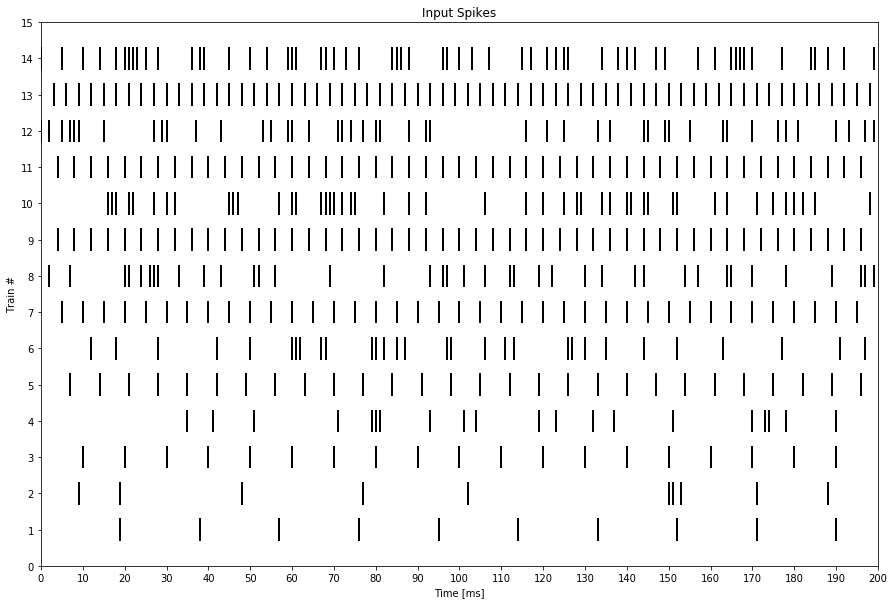

In [11]:
'''
Plot all trains of spikes
'''

# Set figure size 
height = 10
width = 15
fig, axs = plt.subplots(1, figsize=(width,height))

# For each *.csv, plot spikes
n = len(files)
for i in range(n):
    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)
    l = len(i_spikes)
    c = 'k' #'C{}'.format(i)
    axs.eventplot(i_indexes, linewidths=2, colors = c, lineoffsets=i+1, linelengths=height/(n+2)) # Plot the timesteps where the neuron spiked
    axs.set_title("Input Spikes")
    axs.set_xlim((0,l))
    axs.set_ylim((0,n+1))
    axs.set_xlabel("Time [ms]")
    axs.set_ylabel("Train #")
    axs.set_xticks(np.arange(0, l+1, 10))
    axs.set_yticks(np.arange(0, n+2, 1))
    axs.grid()

fig.savefig("summary/common/" + "All_Input_Trains.png")